In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pydicom 
import argparse
import yaml
import multiprocessing as mp
import matplotlib.pyplot as plt
import pandas as pd
import SimpleITK as sitk


In [26]:
def read_dicom_series(file_list):
    np_array = []
    print(pydicom.dcmread(file_list[0]))
    for file in file_list:
        image = pydicom.dcmread(file)
        np_array.append(image.pixel_array)
    return np.array(np_array)

def get_files_with_ending(path, ending):
    hr_files = os.listdir(path)
    hr_files = [file for file in hr_files if file.endswith(ending)]
    hr_files.sort()
    hr_files = [os.path.join(path, file) for file in hr_files]
    return hr_files

In [4]:
path = r"C:\Users\Yannick\Documents\repos\deep_femur_segmentation\data\HRpQCT_annotated\pcct"


c:\Users\Yannick\anaconda3\envs\femur\Lib\site-packages\pydicom\filereader.py:440: UserWarning: End of file reached before delimiter (fffe, e0dd) found in file C:\Users\Yannick\Documents\repos\deep_femur_segmentation\data\HRpQCT_annotated\pcct\flowbone_2207_04650_l__h\h0000027_00006.dcm
  warnings.warn(msg, UserWarning)
c:\Users\Yannick\anaconda3\envs\femur\Lib\site-packages\pydicom\filereader.py:440: UserWarning: End of file reached before delimiter (fffe, e0dd) found in file C:\Users\Yannick\Documents\repos\deep_femur_segmentation\data\HRpQCT_annotated\pcct\flowbone_2207_04650_l__h\h0000027_00012.dcm
  warnings.warn(msg, UserWarning)


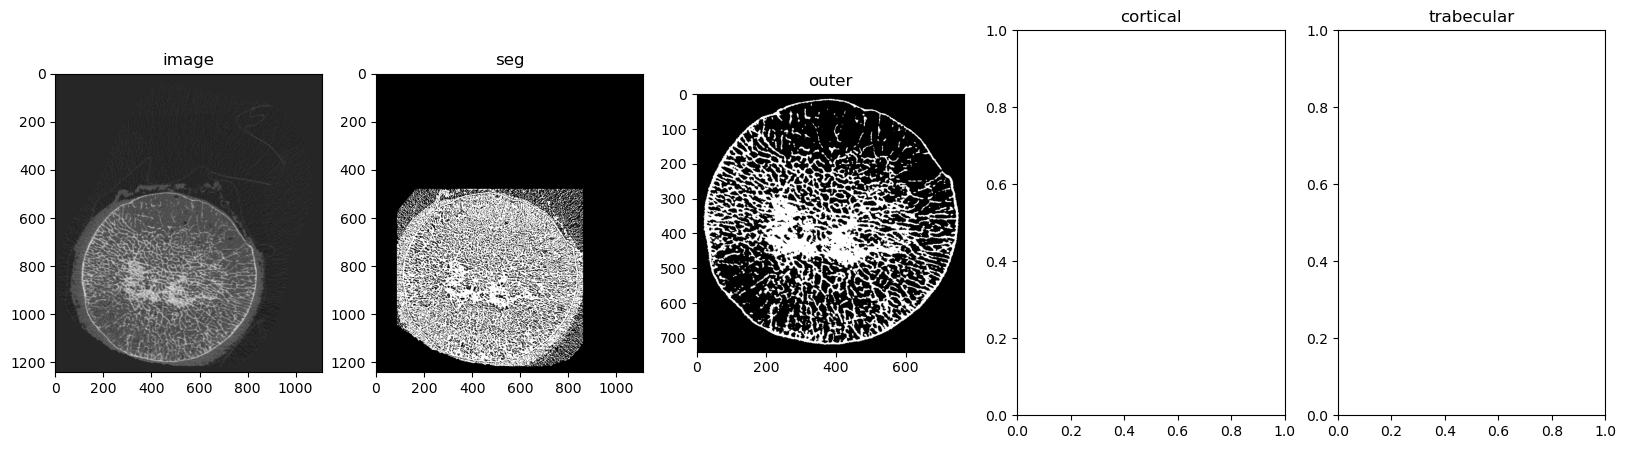

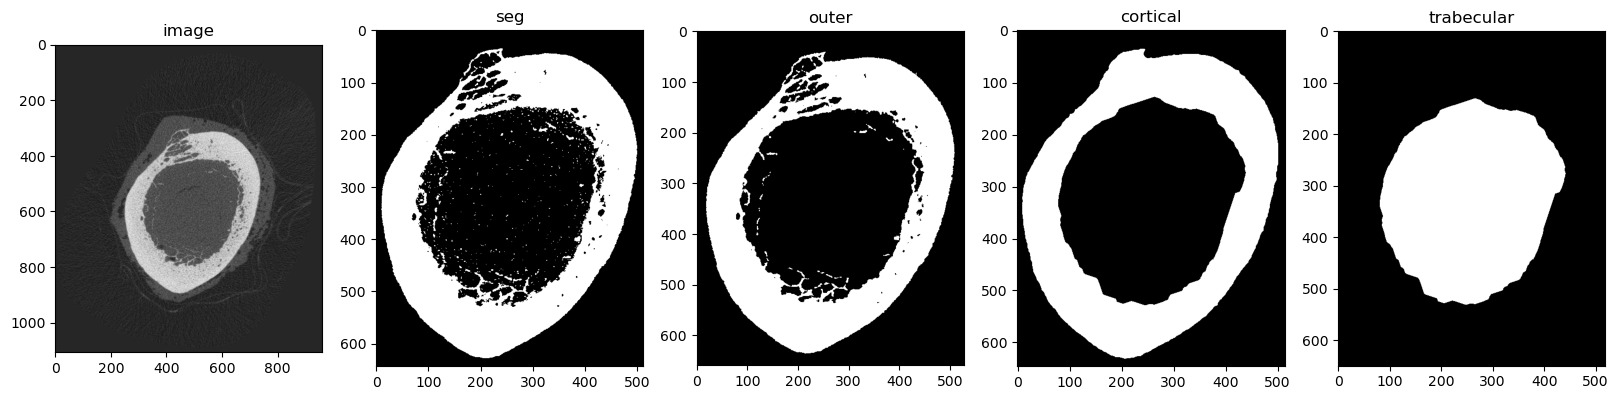

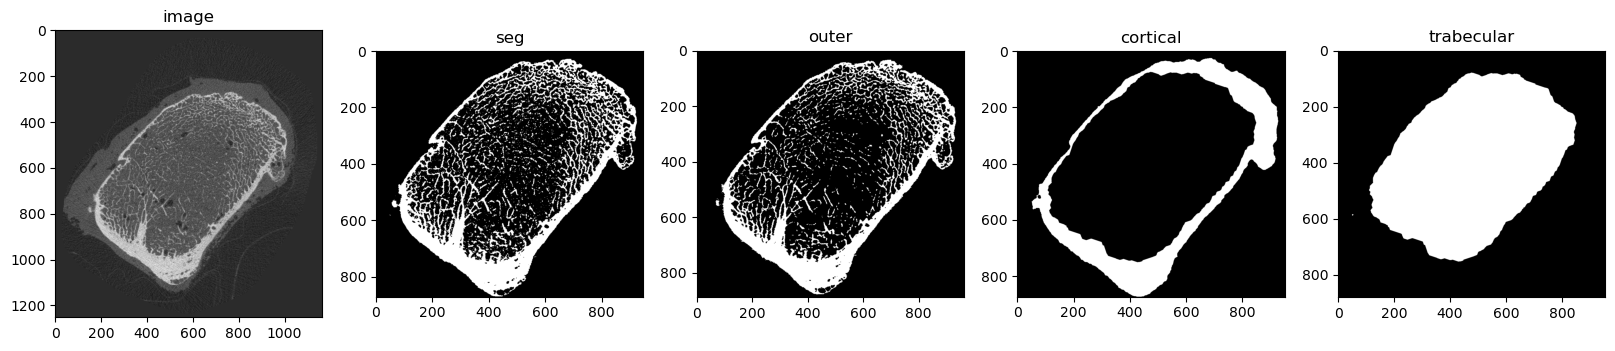

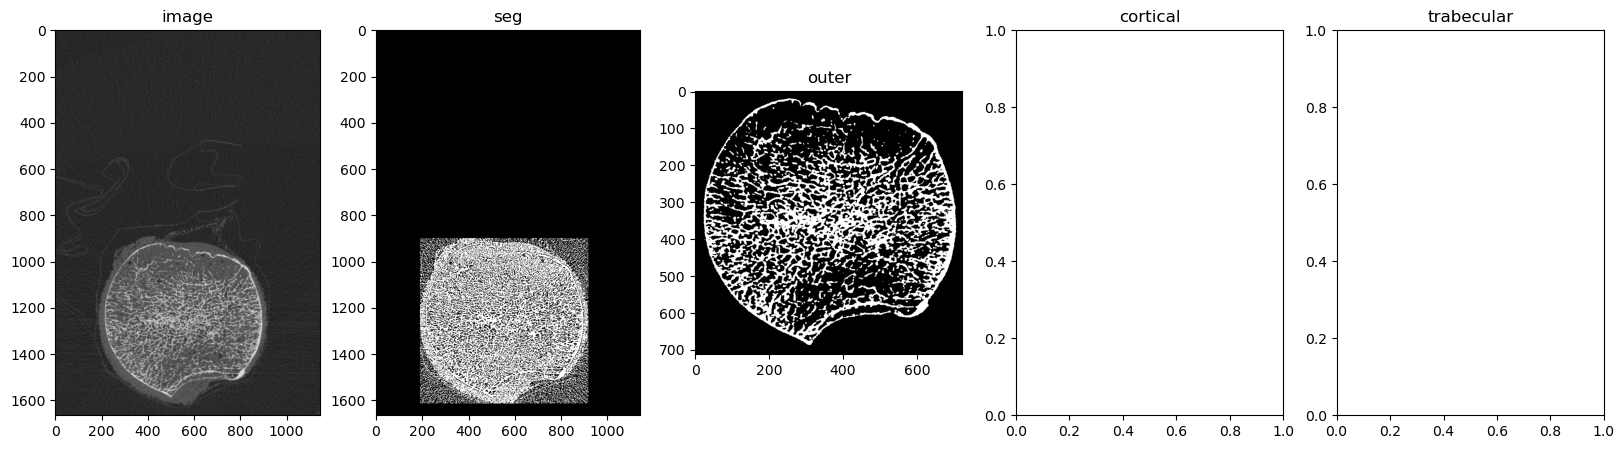

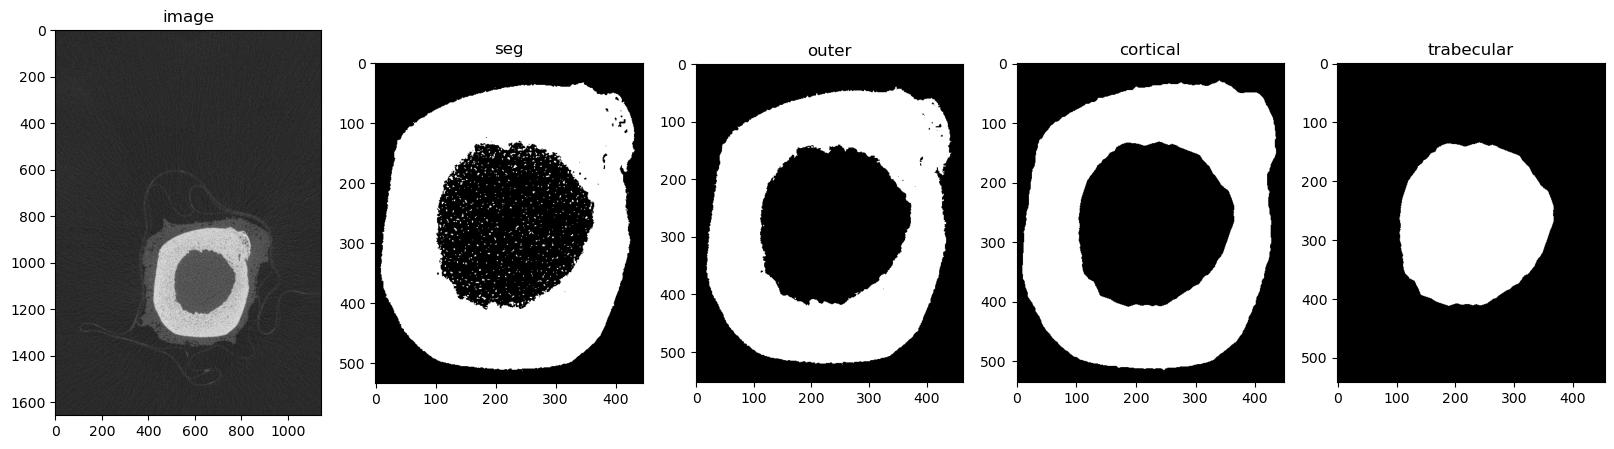

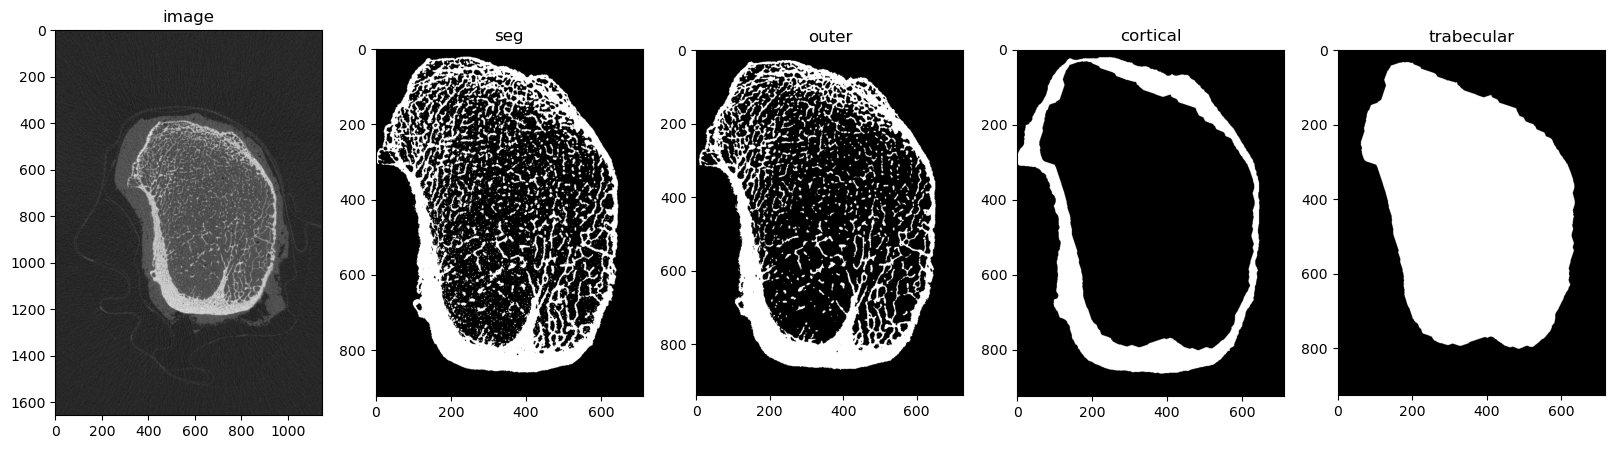

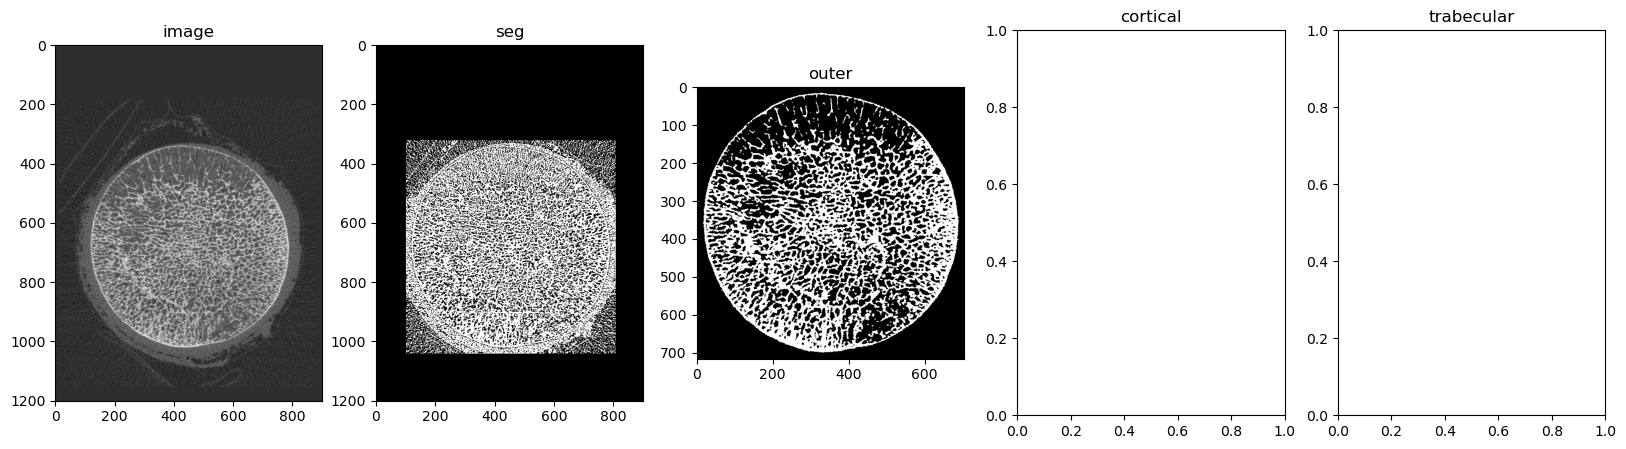

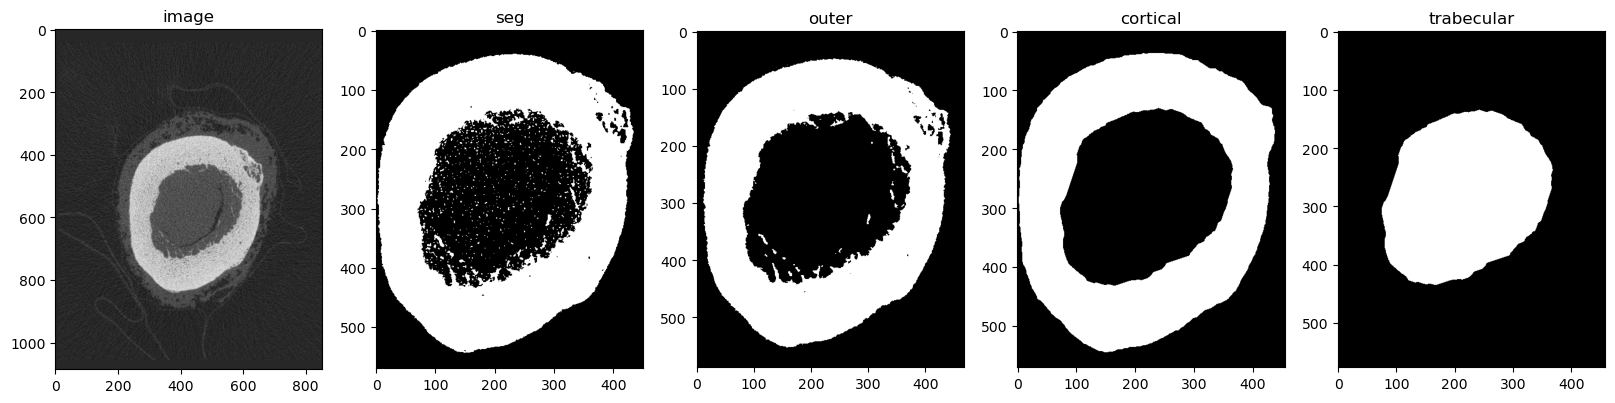

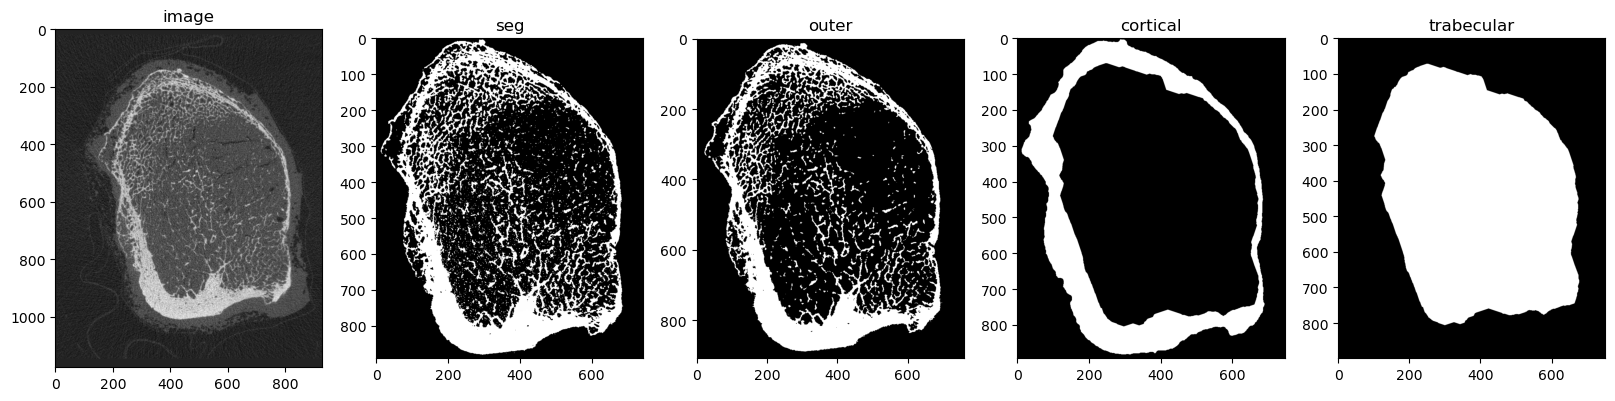

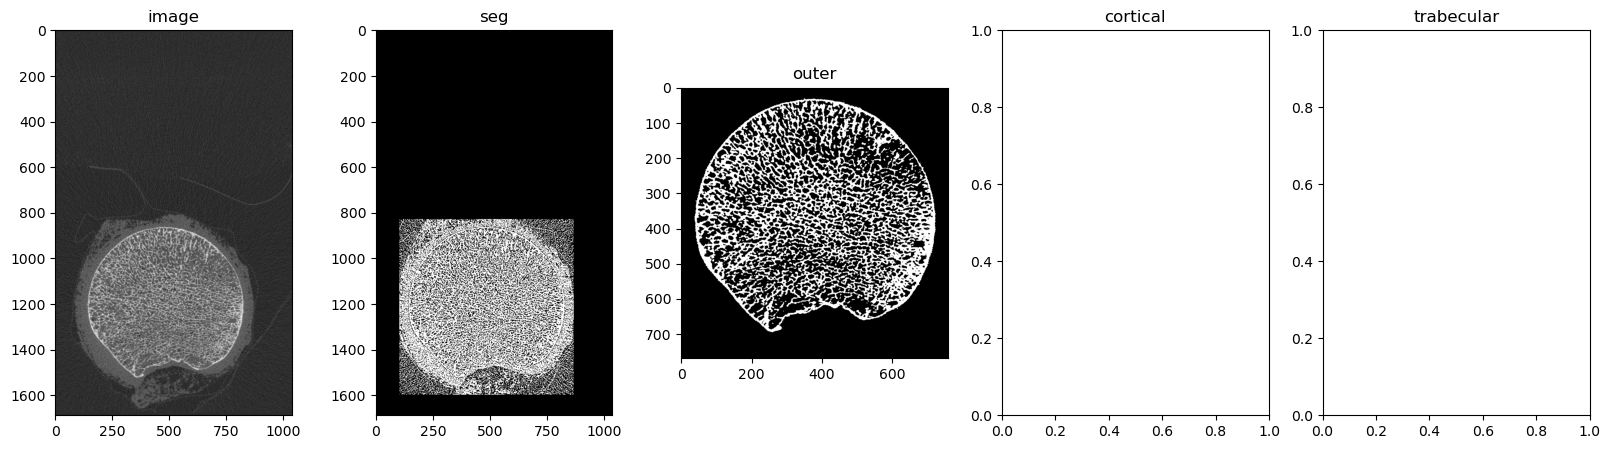

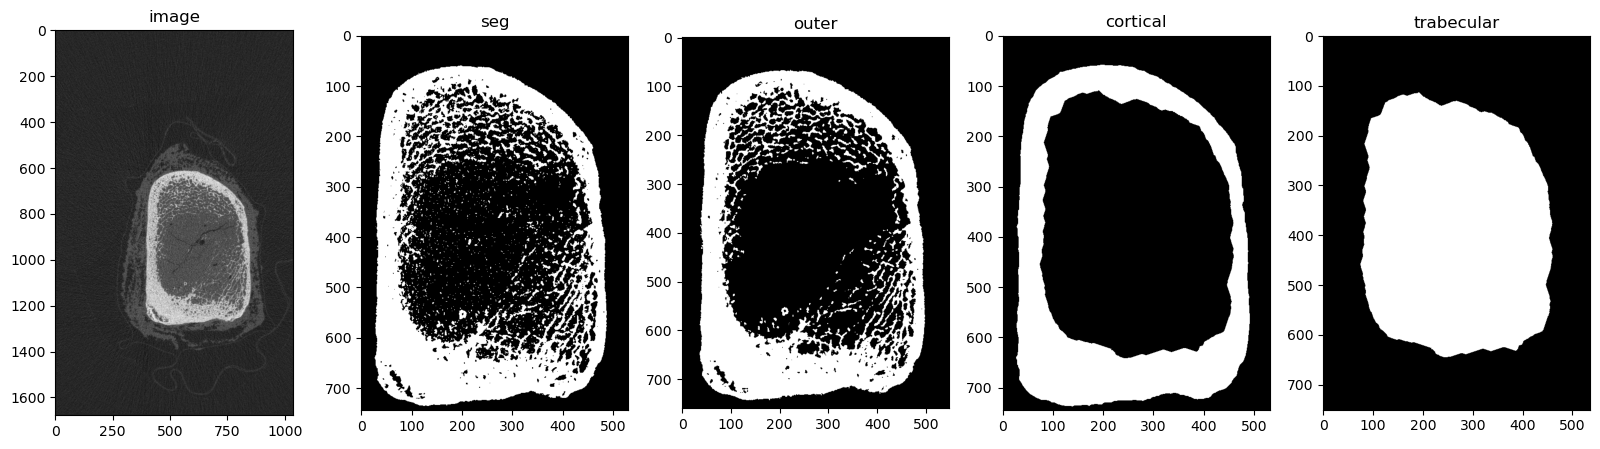

KeyboardInterrupt: 

In [9]:

for folder in os.listdir(path):
    files = os.listdir(os.path.join(path, folder))
    image_files = [file for file in files if len(file.split("_")) == 2]
    seg_files = [file for file in files if "seg" in file]
    outer_files = [file for file in files if "outer" in file]
    cortical_files = [file for file in files if "cort" in file]
    trabecular_files = [file for file in files if "trab" in file]

    image = read_dicom_series([os.path.join(path, folder, file) for file in image_files])
    seg = read_dicom_series([os.path.join(path,folder, file) for file in seg_files])
    outer = read_dicom_series([os.path.join(path,folder, file) for file in outer_files])
    cortical = read_dicom_series([os.path.join(path,folder, file) for file in cortical_files])
    trabecular = read_dicom_series([os.path.join(path,folder, file) for file in trabecular_files])

    fig, axs = plt.subplots(1, 5, figsize=(20, 5))
    axs[0].imshow(image[75], cmap="gray")
    axs[0].set_title("image")
    axs[1].imshow(seg[75], cmap="gray")
    axs[1].set_title("seg")
    axs[2].imshow(outer[75], cmap="gray")
    axs[2].set_title("outer")
    if(cortical.size != 0):
        axs[3].imshow(cortical[75], cmap="gray")
    axs[3].set_title("cortical")
    if(trabecular.size != 0):
        axs[4].imshow(trabecular[75], cmap="gray")
    axs[4].set_title("trabecular")
    plt.show()





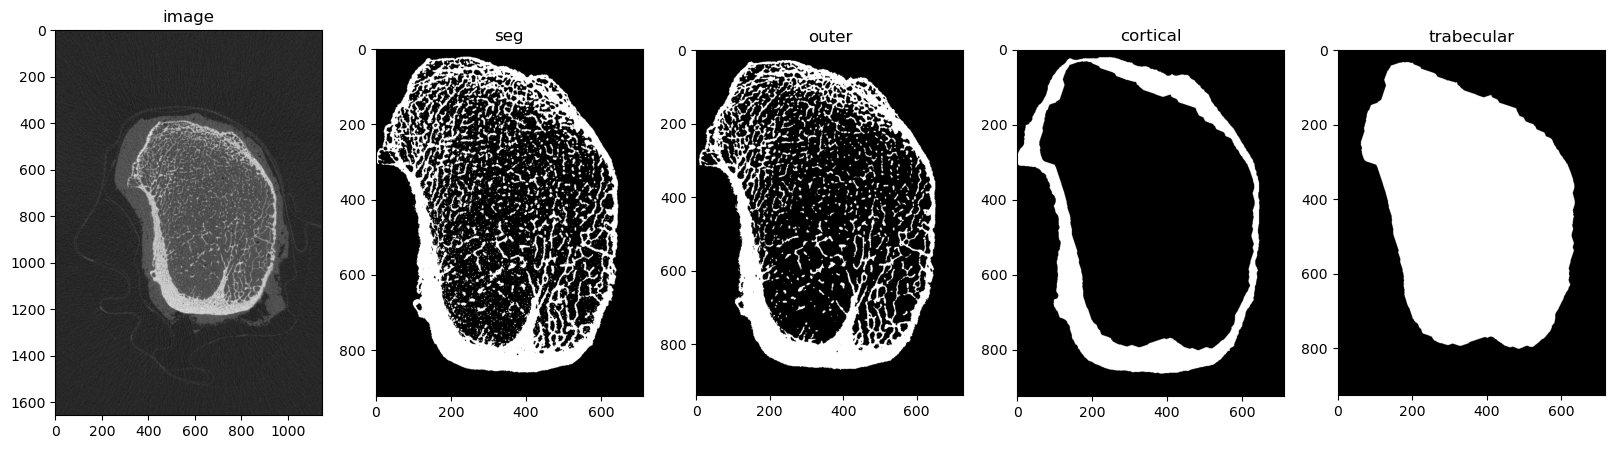

In [25]:
folder = "flowbone_2208_04835_r__p"



files = os.listdir(os.path.join(path, folder))
image_files = [file for file in files if len(file.split("_")) == 2]
seg_files = [file for file in files if "seg" in file]
outer_files = [file for file in files if "outer" in file]
cortical_files = [file for file in files if "cort" in file]
trabecular_files = [file for file in files if "trab" in file]

image = read_dicom_series([os.path.join(path, folder, file) for file in image_files])
seg = read_dicom_series([os.path.join(path,folder, file) for file in seg_files])
outer = read_dicom_series([os.path.join(path,folder, file) for file in outer_files])
cortical = read_dicom_series([os.path.join(path,folder, file) for file in cortical_files])
trabecular = read_dicom_series([os.path.join(path,folder, file) for file in trabecular_files])

fig, axs = plt.subplots(1, 5, figsize=(20, 5))
axs[0].imshow(image[75], cmap="gray")
axs[0].set_title("image")
axs[1].imshow(seg[75], cmap="gray")
axs[1].set_title("seg")
axs[2].imshow(outer[75], cmap="gray")
axs[2].set_title("outer")
if(cortical.size != 0):
    axs[3].imshow(cortical[75], cmap="gray")
axs[3].set_title("cortical")
if(trabecular.size != 0):
    axs[4].imshow(trabecular[75], cmap="gray")
axs[4].set_title("trabecular")
plt.show()





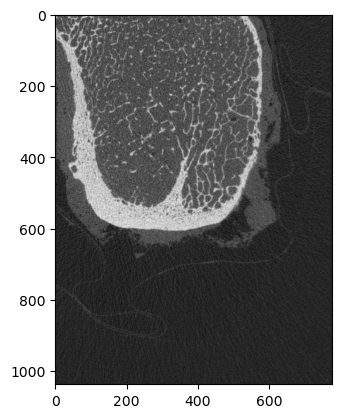

In [30]:
#619;370;1000
plt.imshow(image[75, 619:,370:], cmap="gray")

In [34]:
locs = [1000,619,370]

min_shape = list(image.shape)

for i in [image, seg, outer, cortical, trabecular]:
    print(i.shape)
    for j in range(3):
        if(i.shape[j] < min_shape[j]):
            min_shape[j] = i.shape[j]
print(min_shape)

(150, 1656, 1146)
(150, 924, 711)
(152, 940, 728)
(151, 924, 713)
(151, 928, 718)
[150, 924, 711]


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 188
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.16.756.5.23.3514.67.74.3.20230908154731.4264851914.1679
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.16.756.5.23.1.2
(0002, 0013) Implementation Version Name         SH: 'SCANCO_V1.2b'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 2.16.756.5.23.3514.67.74.3.20230908154731.4264851914.1679
(0008, 0020) Study Date                          DA: '20230908'
(0008, 0021) Series Date                        

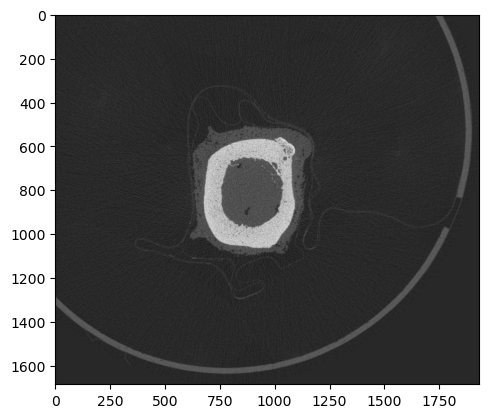

In [35]:
# HRpQCT

hr_path = r"C:\Users\Yannick\Documents\repos\deep_femur_segmentation\data\HR-pQCT\1_2208_04835_R\part_2"

hr_files = get_files_with_ending(hr_path, ".DCM_1")
hr_files = [file for file in hr_files if int(file.split("_")[-2].split(".")[0]) >= locs[0]]
hr_files = hr_files[:160]
# hr = np.stack([np.load(file) for file in hr_files])
hr = read_dicom_series(hr_files)
print(hr.shape)

hr = hr[:,locs[1]:, locs[2]:]
print(hr.shape)
plt.imshow(hr[75], cmap="gray")

(160, 1024, 1024)
(160, 1024, 1024)


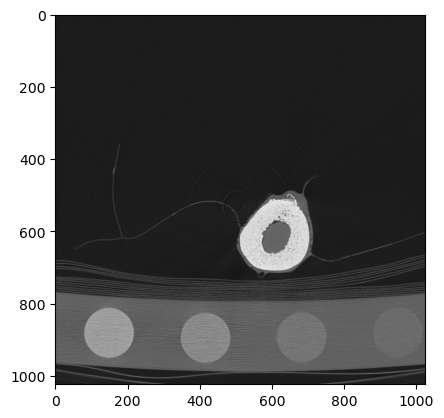

In [24]:
# PCCT (1)
pcct = r"../data/PCCT/1_2208_04835_R/Ex_vivo_bone_0_20_Br89_Q3_R_10"

pcct_files = get_files_with_ending(pcct, ".dcm")
pcct_files = [file for file in pcct_files if int(file.split("-")[-1].split(".")[0]) >= 2*locs[0]]
pcct_files = pcct_files[:160]
# hr = np.stack([np.load(file) for file in hr_files])
pcct_files = read_dicom_series(pcct_files)
print(pcct_files.shape)

#pcct_files = pcct_files[:, locs[1]:, locs[2]:]
print(pcct_files.shape)
plt.imshow(pcct_files[75], cmap="gray")

(160, 1024, 1024)
(160, 412, 631)


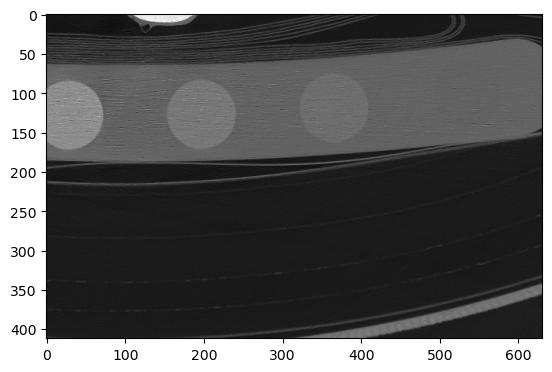

In [26]:
# PCCT (2)
pcct = r"../data/PCCT/1_2208_04835_R/Ex_vivo_bone_0_20_Br89_Q3_R_9"

pcct_files = get_files_with_ending(pcct, ".dcm")
pcct_files = [file for file in pcct_files if int(file.split("-")[-1].split(".")[0]) >= locs[0]]
pcct_files = pcct_files[:160]
# hr = np.stack([np.load(file) for file in hr_files])
pcct_files = read_dicom_series(pcct_files)
print(pcct_files.shape)

pcct_files = pcct_files[:, locs[1]:, locs[2]:]
print(pcct_files.shape)
plt.imshow(pcct_files[75], cmap="gray")